# ABL postprocessing

In [1]:
# Load the amrwind-frontend module
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math
import postproamrwindsample as ppsample

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the AMR-Wind case
rundir = '/ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2'
case = amrwind.MyApp.init_nogui()

Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics00000.nc
Time range: 0.250000 to 3443.250000
Done.
ustar
Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics12000.nc
Time range: 3000.250000 to 7146.000000
Done.
ustar
Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/./post_processing/abl_statistics28500.nc
Time range: 7125.250000 to 11125.000000
Done.
ustar


Text(0, 0.5, 'Ustar [m/s]')

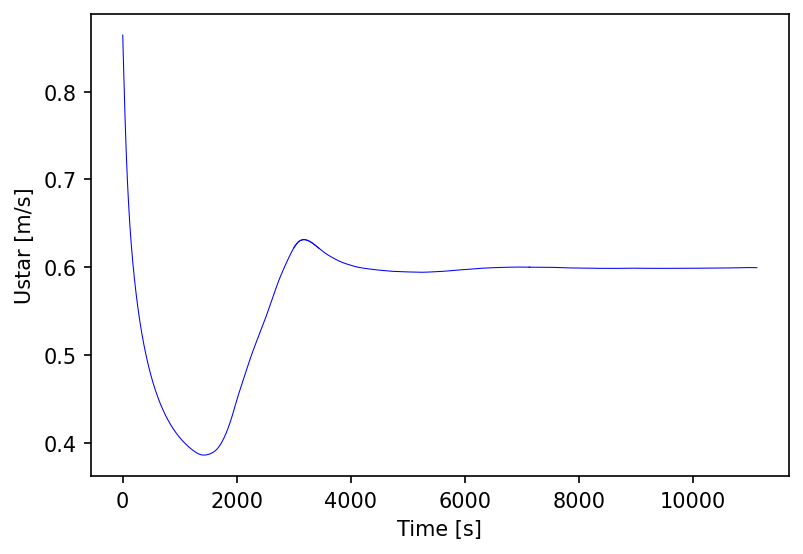

In [3]:
fig, ax = plt.subplots(figsize=(6,4), facecolor='w', dpi=150)

ablstatsfiles = ['./post_processing/abl_statistics00000.nc',
                 './post_processing/abl_statistics12000.nc',
                 './post_processing/abl_statistics28500.nc'
               ]
for f in ablstatsfiles:
    case.ABLpostpro_loadnetcdffile(rundir+'/'+f)
    data = case.ABLpostpro_plotscalars(ax=ax, plotvars=['ustar'], doplot=False)
    ax.plot(data['ustar']['t'], data['ustar']['data'], 'b-', lw=0.5)

#ax.set_ylim([0.55, 0.65])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Ustar [m/s]')

## Plot profiles

Loading u
Loading v
Loading u'u'_r
Loading v'v'_r


Text(0.5, 0, 'TI [-]')

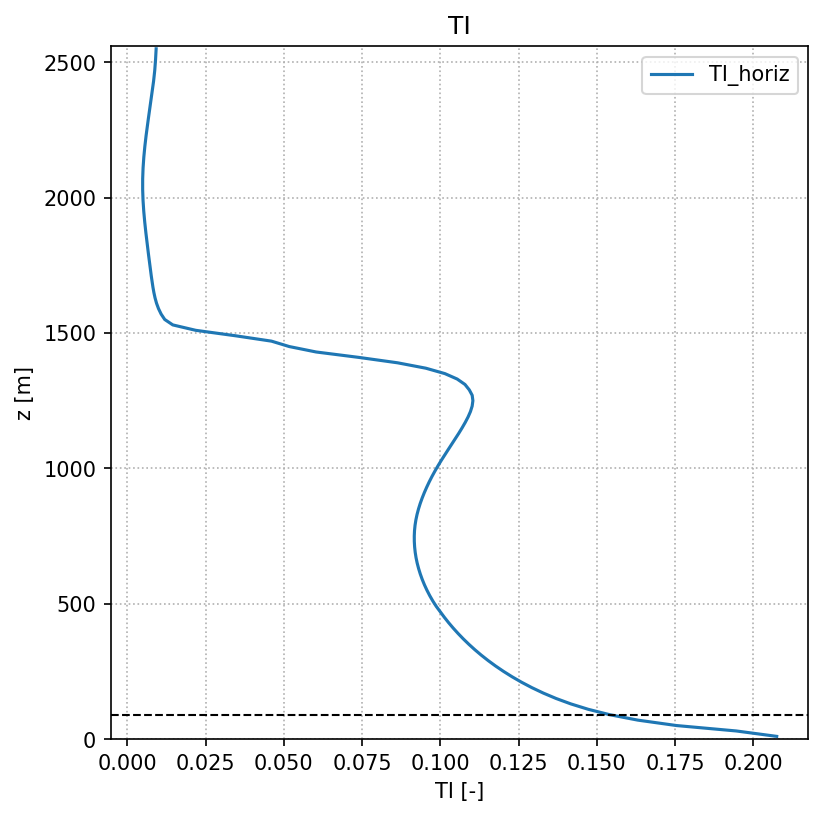

In [4]:
# Plot TKE
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
tke = case.ABLpostpro_plotprofiles(ax=ax, plotvars=['TI_horiz'], avgt=[10000, 15000])
ax.set_ylim([0, 2560])
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)
ax.set_title('TI')
ax.set_xlabel('TI [-]')

Loading u
Loading v
Loading w


Text(0.5, 0, 'Velocity [m/s]')

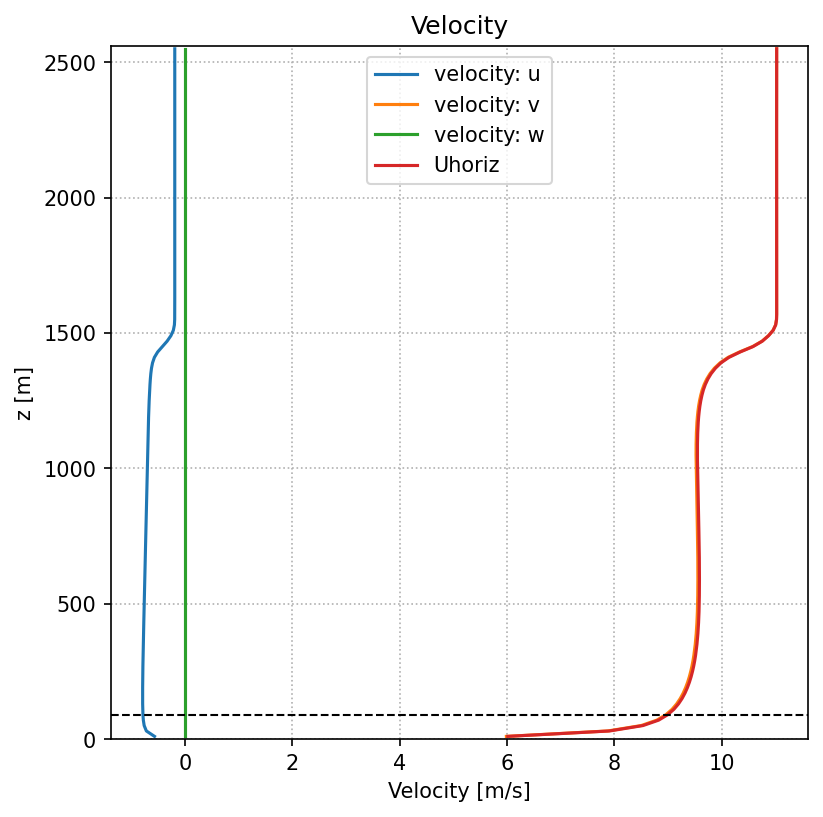

In [5]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)
tke = case.ABLpostpro_plotprofiles(ax=ax, plotvars=['velocity', 'Uhoriz'], avgt=[10000, 15000])
ax.set_ylim([0, 2560])
ax.grid(ls=':')
ax.axhline(90, color='k', ls='--', lw=1)
ax.set_title('Velocity')
ax.set_xlabel('Velocity [m/s]')

## Plot profile

In [6]:
case.Samplepostpro_loadnetcdffile(rundir+'/post_processing/farmhh_28500.nc')

Loading /ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2/post_processing/farmhh_28500.nc


In [7]:
x,y,z,s1,s2,vx = ppsample.getPlaneSampleAtTime(case.sample_ncdat, 'Farm_hh90', 'velocityx', 160, 0)
x,y,z,s1,s2,vy = ppsample.getPlaneSampleAtTime(case.sample_ncdat, 'Farm_hh90', 'velocityy', 160, 0)

Text(0, 0.5, 'y [m]')

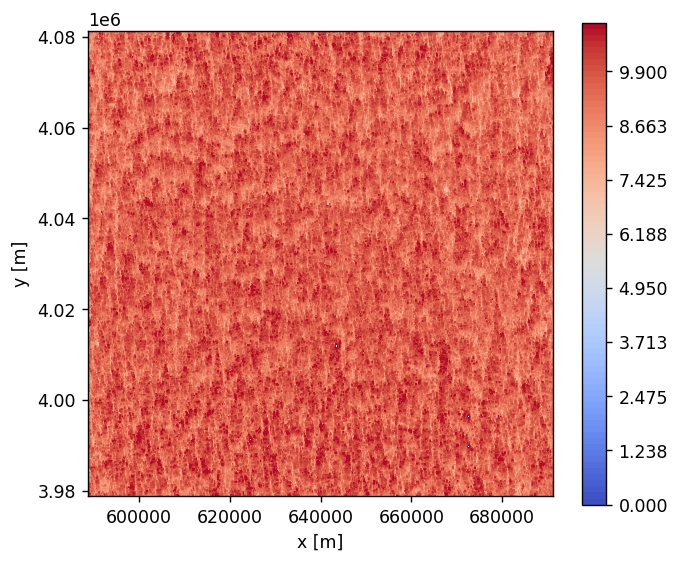

In [9]:
vh = np.sqrt(vx**2 + vy**2)

clevels=np.linspace(0,11,81)
plt.figure(figsize=(6,5), dpi=125)
plt.contourf(x, y, vh, clevels, cmap='coolwarm')
plt.colorbar()
plt.axis('scaled')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
#plt.title('horizontal U, t=%0.1f, z=150m'%(40*25+20000))